In [1]:
import os
import glob

from scipy.io import loadmat
from collections import defaultdict

In [4]:
anno_fn = 'InriaNewTrainingLabels.vbb'
##Reads the vbb annotation
vbb = loadmat(anno_fn)
nFrame = int(vbb['A'][0][0][0][0][0])
objLists = vbb['A'][0][0][1][0]
maxObj = int(vbb['A'][0][0][2][0][0])
objInit = vbb['A'][0][0][3][0]
objLbl = [str(v[0]) for v in vbb['A'][0][0][4][0]]
objStr = vbb['A'][0][0][5][0]
objEnd = vbb['A'][0][0][6][0]
objHide = vbb['A'][0][0][7][0]
altered = int(vbb['A'][0][0][8][0][0])
log = vbb['A'][0][0][9][0]
logLen = int(vbb['A'][0][0][10][0][0])

In [6]:
data = defaultdict(dict)
data['nFrame'] = nFrame
data['maxObj'] = maxObj
data['log'] = log.tolist()
data['logLen'] = logLen
data['altered'] = altered
data['frames'] = defaultdict(list)
data

defaultdict(dict,
            {'altered': 0,
             'frames': defaultdict(list, {}),
             'log': [733905.609927],
             'logLen': 1,
             'maxObj': 1997,
             'nFrame': 614})

In [76]:
n_obj = 0
post = []
for frame_id, obj in enumerate(objLists):
    if len(obj) > 0:
        for id, pos, occl, lock, posv in zip(
            obj['id'][0], obj['pos'][0], obj['occl'][0],
            obj['lock'][0], obj['posv'][0]):
            keys = obj.dtype.names
            id = int(id[0][0]) - 1  # MATLAB is 1-origin
            pos = pos[0].tolist()
            post.append(pos)
            #print(pos[0])#.tolist())
            occl = int(occl[0][0])
            lock = int(lock[0][0])
            posv = posv[0].tolist()
            '''
            datum = dict(zip(keys, [id, post, occl, lock, posv]))
            datum['lbl'] = str(objLbl[datum['id']])
            datum['str'] = int(objStr[datum['id']])
            datum['end'] = int(objEnd[datum['id']])
            datum['hide'] = int(objHide[datum['id']])
            datum['init'] = int(objInit[datum['id']])
            data['frames'][frame_id].append(datum)
            '''
            n_obj += 1

print(dname, anno_fn, n_obj)
all_obj += n_obj

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [77]:
#print(pos[314],names[314])
x = post[id][0]
y = post[id][0]
w = post[id][0]
h = post[id][0]
frame_id

315

In [78]:
names = []
for file in os.listdir('Train/pos/'):
    #print(file)
    names.append(file)

In [79]:
names[frame_id]
#len(names)

'crop001650.png'

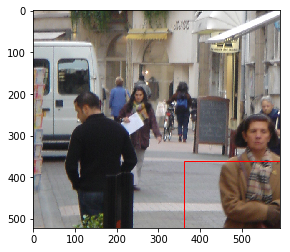

In [80]:
path = 'Train/pos/'+names[frame_id]
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open(path), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()


## Test

In [37]:
## Read file names since INRIA has some random ones
names = []
for file in sorted(glob.glob('Train/pos/*')):
    names.append(file[10:])

In [ ]:
n_obj = 0
for frame_id, obj in enumerate(objLists):
    for id, pos, occl, lock, posv in zip(obj['id'][0], obj['pos'][0], obj['occl'][0],obj['lock'][0], obj['posv'][0]):
        keys = obj.dtype.names
        id = int(id[0][0]) - 1  # MATLAB is 1-origin
        pos = pos[0].tolist()
        occl = int(occl[0][0])
        lock = int(lock[0][0])
        posv = posv[0].tolist()
        datum = dict(zip(keys, [id, pos, occl, lock, posv]))
        datum['lbl'] = str(objLbl[datum['id']])
        datum['str'] = int(objStr[datum['id']])
        datum['end'] = int(objEnd[datum['id']])
        datum['hide'] = int(objHide[datum['id']])
        datum['init'] = int(objInit[datum['id']])
        print (frame_id,datum['lbl'],datum['init'])
        
        data[set_name][video_name]['frames'][frame_id].append(datum)
        n_obj += 1

In [ ]:
path = 'Train/pos/'+names[frame_id]
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open(path), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((pos[0],pos[1]),pos[2],pos[3],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

## Conversion of the old labels for YOLO

In [66]:
def read_lines(f):
    for line in f:
        if 'Image size (X x Y x C) :' in line:
            words = line.split()
            iw = int(words[8])
            ih = int(words[10])
        if 'Bounding box for object' in line:
            words = line.split()
            xmin = int(words[12][1:-1])
            ymin = int(words[13][:-1])
            xmax = int(words[15][1:-1])
            ymax = int(words[16][:-1])
            x = 1.0*(xmax+xmin)/2
            y = 1.0*(ymax+ymin)/2
            width = xmax-xmin
            heigth = ymax-ymin
            an['width'] = 1.0*width/iw
            an['height'] = 1.0*heigth/ih
            an['cx'] = 1.0*x/iw
            an['cy'] = 1.0*y/ih
            newline = '0 '+str(an['cx'])+' '+str(an['cy']) + ' '+str(an['width']) + ' '+str(an['height'])
            with open(name,'a') as w:
                w.write(newline+'\n')

In [67]:
# Training
for anno_fn in sorted(glob.glob('Train/annotations/*.txt')):
    iw = 0
    ih = 0
    name = ''
    an = {}
    with open(anno_fn,'r',encoding='latin-1') as f:
        name = 'Train/labels/' + anno_fn[18:-4]+'.txt'
        read_lines(f)

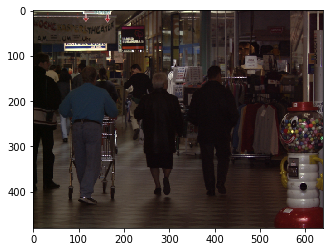

In [58]:
path = 'Train/pos/'+anno_fn[18:-4]+'.png'
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open(path), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((xmin,ymin),an['width'],an['height'],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()


In [ ]:
## Generation of the Train.txt for YOLO
for train in sorted(glob.glob('/home/gianfranco/Documents/darknet/data/INRIAPerson/Train/pos/*')):
    with open('train.txt','a') as w:
                    w.write(train+'\n')

In [68]:
# Test
for anno_fn in sorted(glob.glob('Test/annotations/*.txt')):
    iw = 0
    ih = 0
    name = ''
    an = {}
    with open(anno_fn,'r',encoding='latin-1') as f:
        name = 'Test/labels/' + anno_fn[17:-4]+'.txt'
        read_lines(f)

In [ ]:
## Generation of the Train.txt for YOLO
import glob
for test in sorted(glob.glob('/home/gianfranco/Documents/darknet/data/INRIAPerson/Test/pos/*')):
    with open('test.txt','a') as w:
                    w.write(test+'\n')